In [ ]:
!nvidia-smi

Sat Apr 20 15:48:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="#Enter your api key#")
project = rf.workspace("mrugank").project("webpage-element-detection-iswmz")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Webpage-element-detection-1 in yolov8:: 100%|██████████| 2424/2424 [00:00<00:00, 5507.65it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Webpage-element-detection-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

In [ ]:
!ls /content/runs/detect/train4

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1713628373.850fe81cb6c3.1525.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


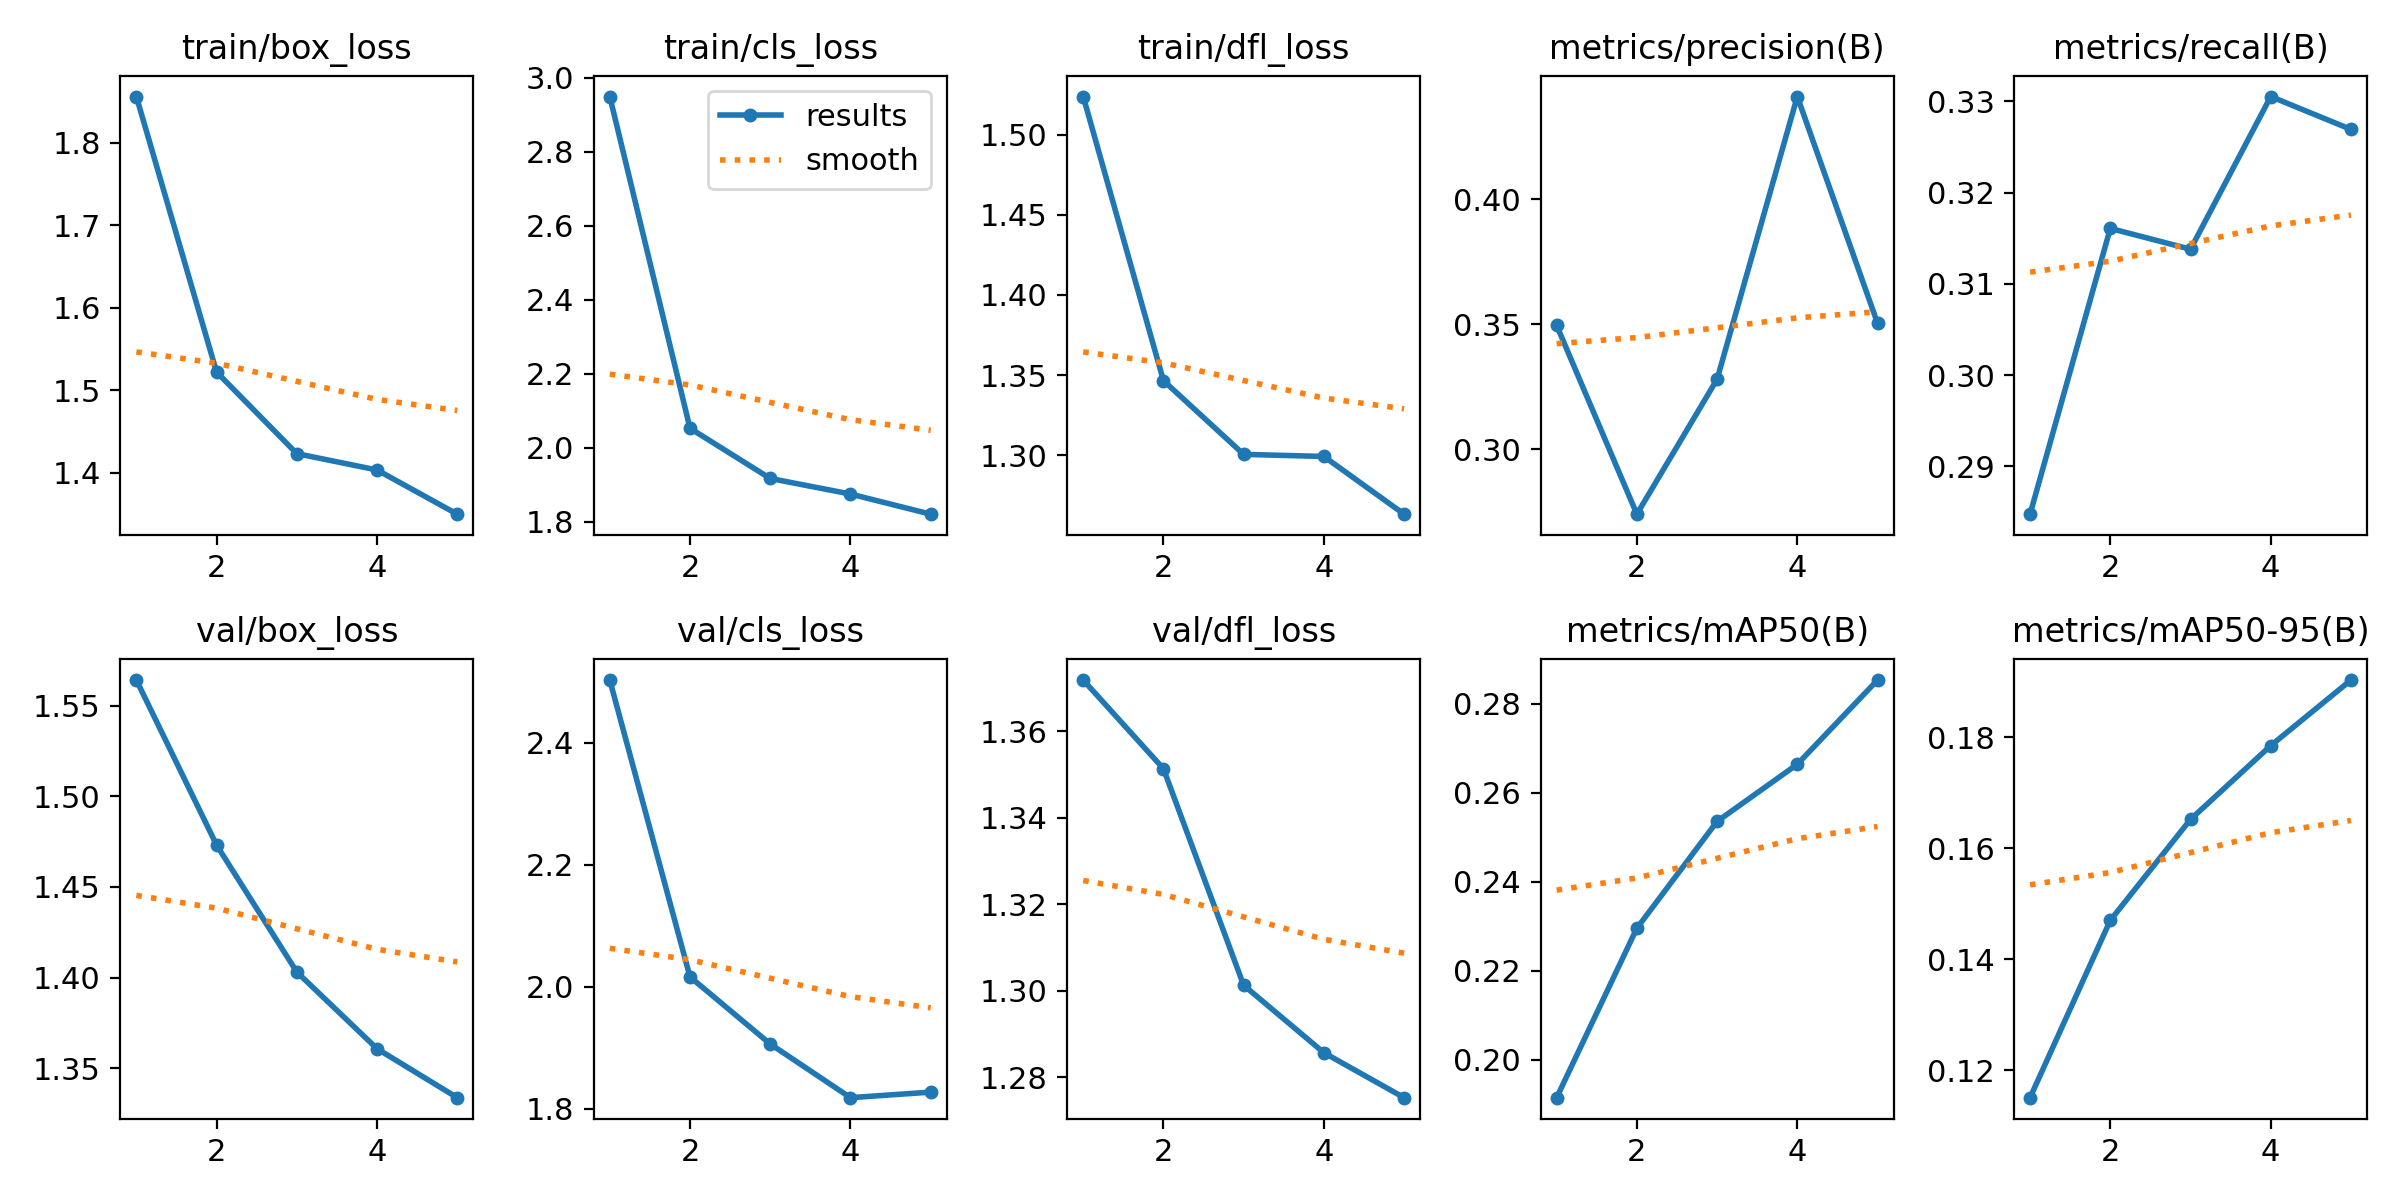

In [ ]:
from IPython.display import Image

%cd {HOME}
Image(filename='/content/runs/detect/train4/results.png', width=600)


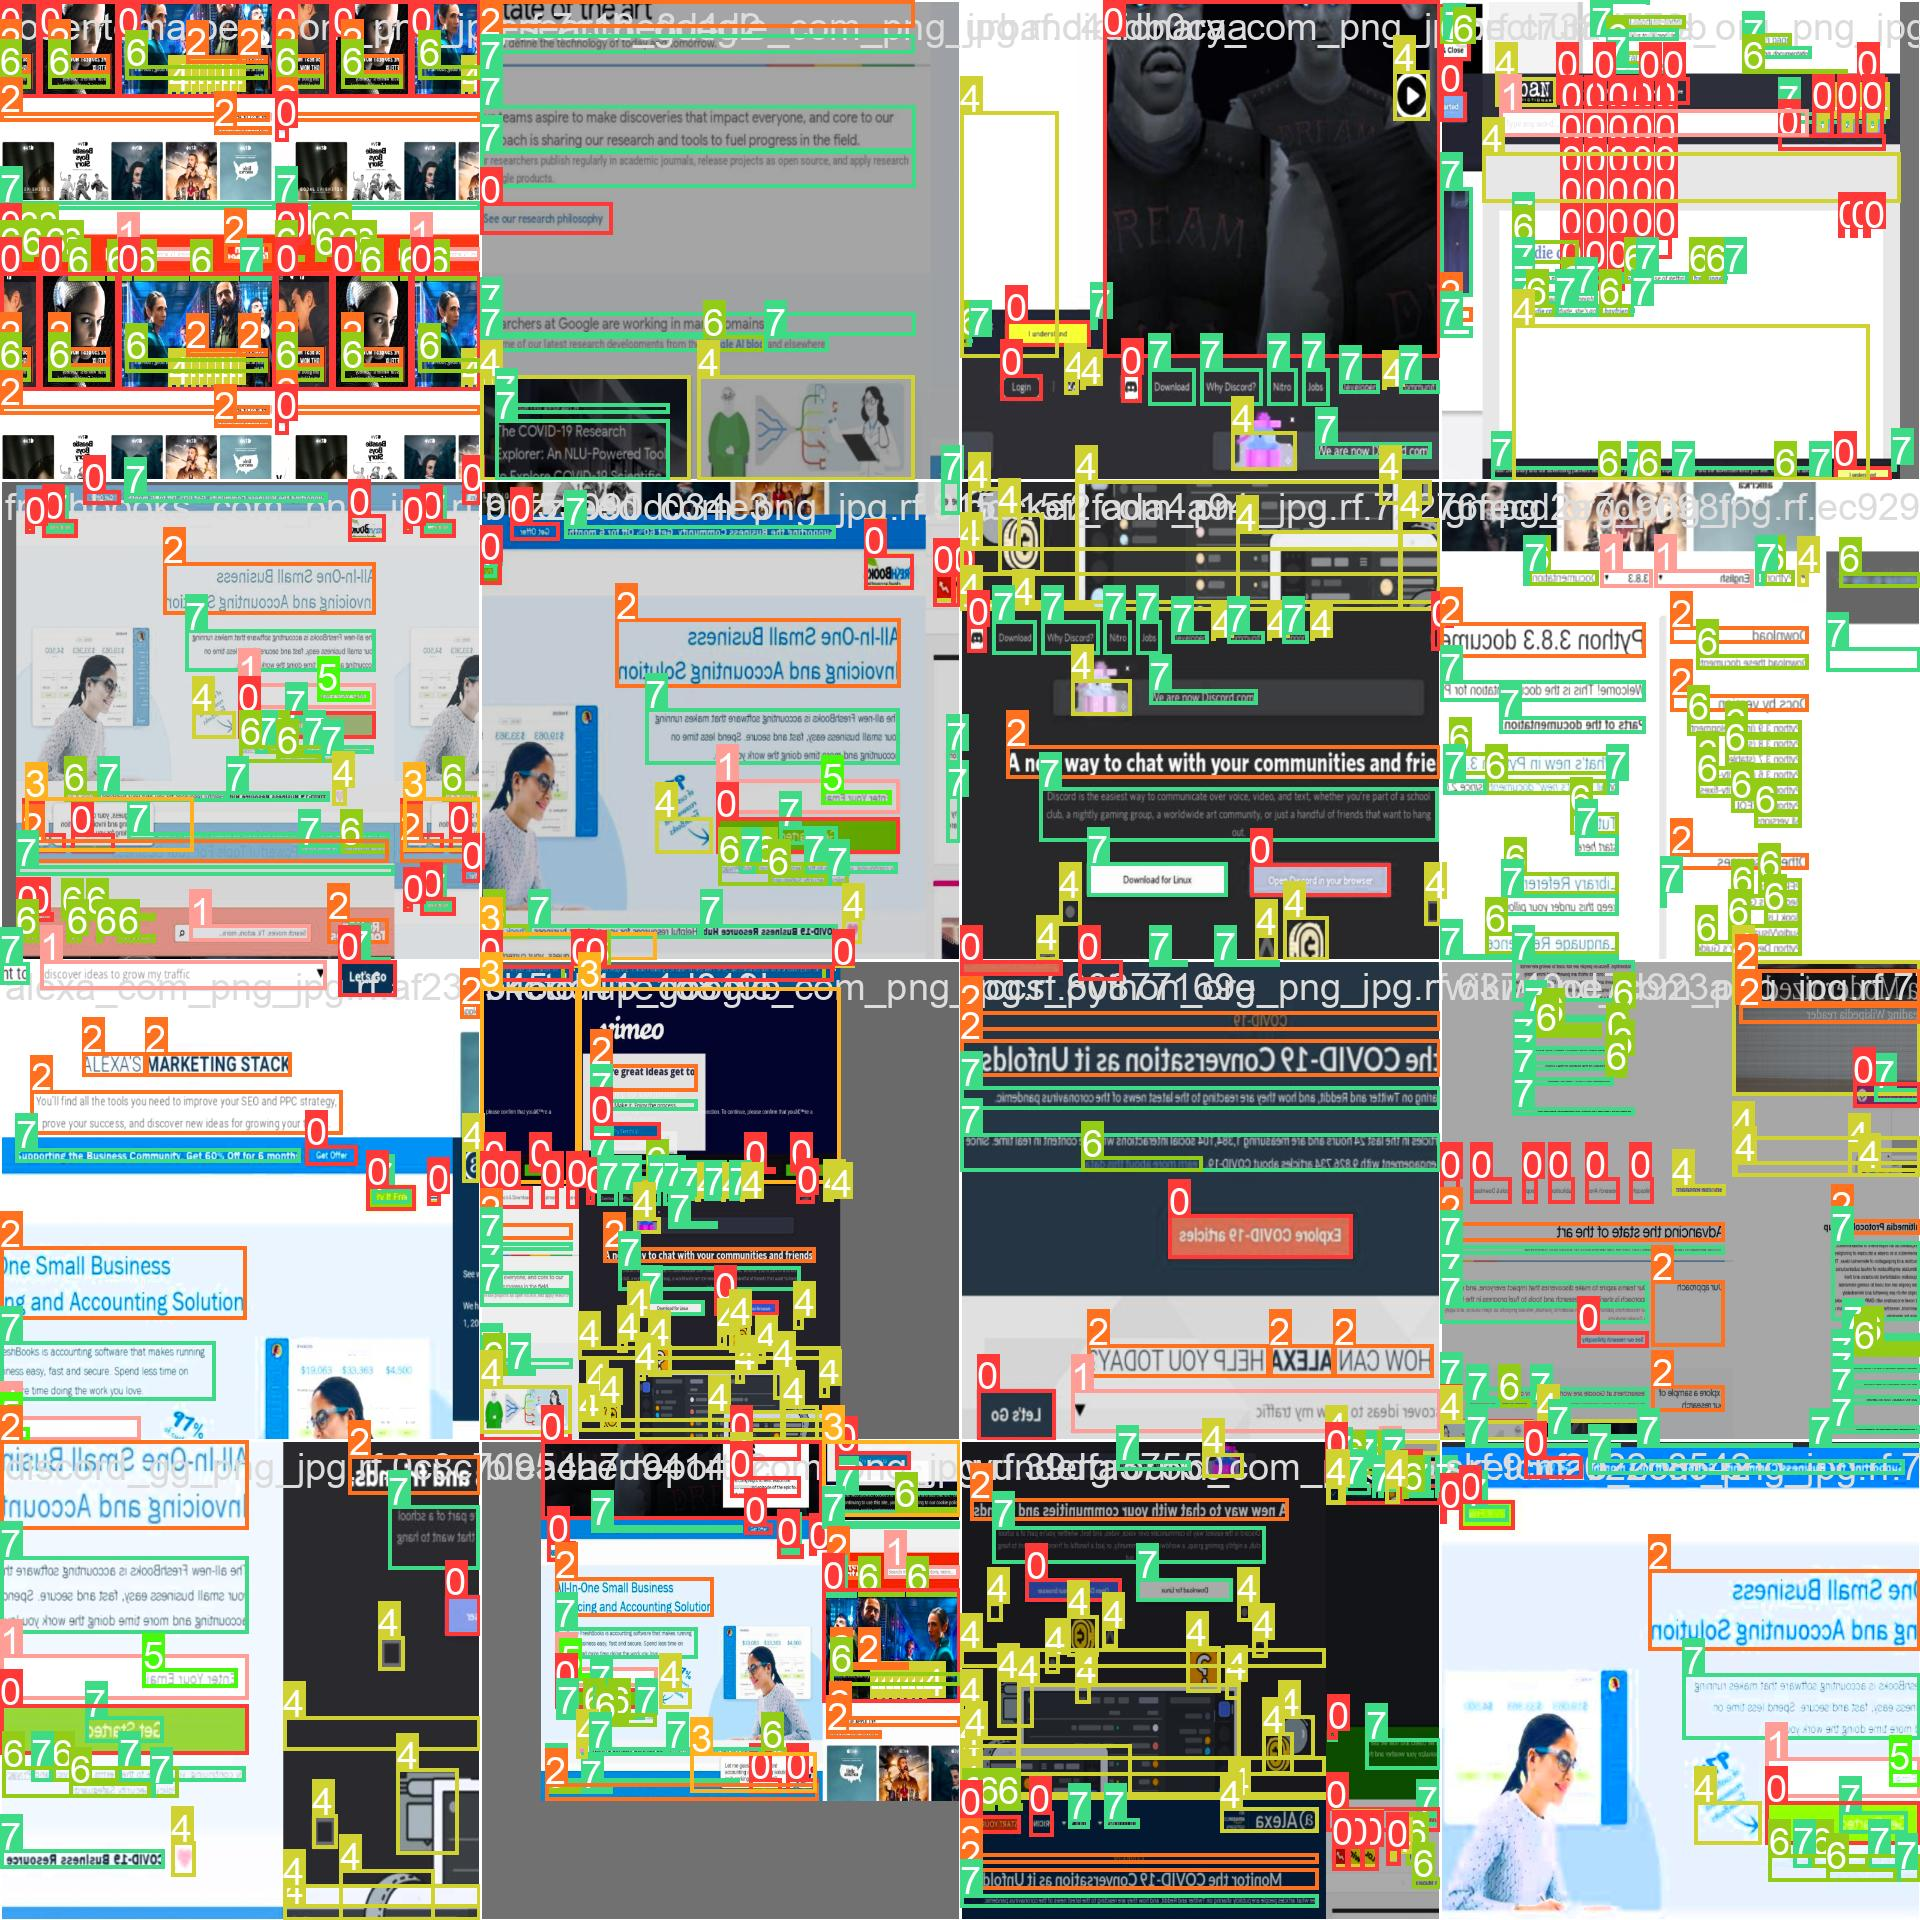

In [ ]:

Image(filename=f'/content/runs/detect/train4/train_batch0.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Webpage-element-detection-1/valid/labels.cache... 241 images, 0 backgrounds, 0 corrupt: 100% 241/241 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Webpage-element-detection-1/valid/images/bandsintown_com_png_jpg.rf.1415737e54b0d59c4b98751df1035f2c.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Webpage-element-detection-1/valid/images/deondernemer_nl_png_jpg.rf.1134a6aa97156e64f4a52f65cfabcfac.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Webpage-element-detection-1/valid/images/flickr_com_png_jpg.rf.6912fc709b2b46db9ed5d9de18a10ba2.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/datasets/Webpage-element-detection-1/valid/images/foxnews_com_png_jpg.rf.31d35065d6035086368568401c9e37ea.jpg: 2 duplicate labels removed
val: WARNING 

In [ ]:

!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/122 /content/datasets/Webpage-element-detection-1/test/images/addons_mozilla_org_png_jpg.rf.a1effb123e7c1c8c5e16cd783171c70c.jpg: 800x800 8 buttons, 1 field, 3 headings, 8 images, 5 links, 11 texts, 22.5ms
image 2/122 /content/datasets/Webpage-element-detection-1/test/images/adf_ly_png_jpg.rf.30b989a59bd3fbc9b143a55013d1829d.jpg: 800x800 11 buttons, 2 headings, 1 iframe, 5 images, 3 links, 9 texts, 22.6ms
image 3/122 /content/datasets/Webpage-element-detection-1/test/images/advancedcustomfields_com_png_jpg.rf.bb94c1ccd82beec0d64430d0287f36f1.jpg: 800x800 3 buttons, 2 fields, 4 headings, 2 images, 3 links, 11 texts, 22.5ms
image 4/122 /content/datasets/Webpage-element-detection-1/test/images/ajax_googleapis_com_png_jpg.rf.fa786ba4a6e88ba34a3b945eb94d5a37.jpg: 800x800 3 b

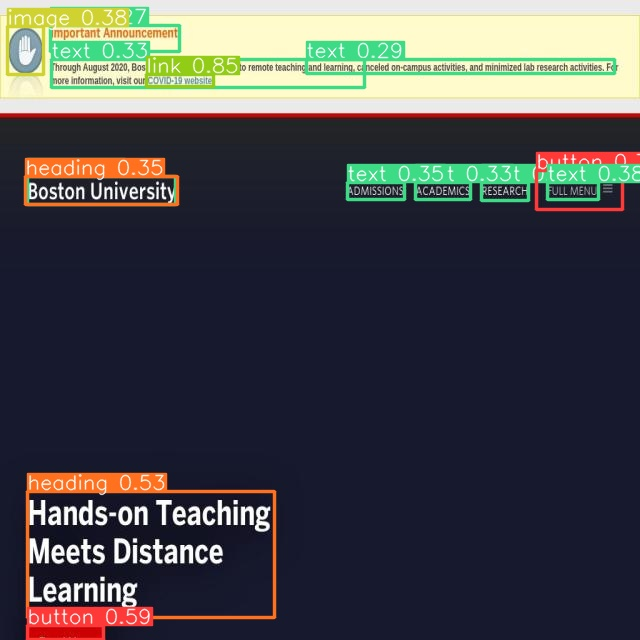

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/bu_edu_png_jpg.rf.6ce7bb6ac84c39df7977a36e05430b35.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")